# Import libraries

In [1]:
#from matplotlib.pyplot import * 
#from numpy import *
import pynested_fit as pynf
import os

%matplotlib inline
#%matplotlib widget
#%matplotlib notebook

In [2]:
# Define the present path as root path
root_path = os.getcwd()
print(root_path)

path = root_path+'/set_of_datafiles'

/Users/martino/Nextcloud/CNRS/work/programs/nested_fit/nested_fit/examples/jupyter_notebooks


# Run the code in a specific directory

In [3]:
# Go to a define analysis
os.chdir(path)
print(path)

/Users/martino/Nextcloud/CNRS/work/programs/nested_fit/nested_fit/examples/jupyter_notebooks/set_of_datafiles


### Example of use of internal functions for two spectra with correlations

In [ ]:
#### Define inputs using internal functions
conf = pynf.Configurator(
    datafiles=['gauss_bg-x0_300-sigma_20-A_300-p_to_bg_20-bin_1.dat', 'gauss_bg-x0_310-sigma_20-A_150-p_to_bg_10-bin_1.dat'], # Name of the data file
    filefmt='.tsv',             # Format of file (here for tab and space separated)
    specstr='x,c',              # Datafile layout (here ch. and counts in ch.)
    expressions=[               # Function expression in latex form
        r'gauss_1(x, A_1, x_1, s, b_1) = \texttt{GAUSS_IF}(x, x_1, A_1, s) + b_1',
        r'gauss_2(x, A_2, x_1, d, s, b_2) = \texttt{GAUSS_IF}(x, x_1+d, A_2, s) + b_2'], 
    params={                    # function expression in latex form
        'b_1': {'value': 0.01,  'step': -1, 'min': 0,   'max': 0.3 },
        'b_2': {'value': 0.01,  'step': -1, 'min': 0,   'max': 0.3 },
        'x_1': {'value': 454.6, 'step': -1, 'min': 0, 'max': 600 },
        'd'  : {'value': 0.2,   'step': -1, 'min': -10, 'max': 30 },
        'A_1': {'value': 300,   'step': -1, 'min': 0,   'max': 500},
        'A_2': {'value': 300,   'step': -1, 'min': 0,   'max': 500},
        's':   {'value': 20,    'step': -1, 'min': 10,  'max': 30}
    },
    data_1={'xmin': 0, 'xmax': 650},# Boundaries of data
    data_2={'xmin': 0, 'xmax': 650},# Boundaries of data
    livepoints=1000,                  # Number of live points
    search_method='SLICE_SAMPLING',   # Search method
    search_params=(0.5, 3),           # Parameters of chosen method
    conv_accuracy=1.E-05,             # Evidence final accuracy
    cluster_enable=False,             # clustering recognition on/off
    # cluster_method='k',             # method used
    # cluster_parameter1=0.5,         # method parameter 1 (if needed)
    # cluster_parameter2=0.2,         # method parameter 1 (if needed)
)

In [9]:
# Run the code

# For visualising the progress of the execution use this command
out = conf.sample(output_mode='live')

# For visualising the progress graphycally (not working in Google Colab), use
# out = conf.sample(output_mode='full')

# If nothing shows, use simply the command (symlink to created or version to be used)
# Create the command to run nested fit in case of need
# run_nested_fit = os.system('nested_fit'+pynf.__version__)
# run_nested_fit

# For silently running the code and save the raw output in a dictionnary, use this command
#out = conf.sample(output_mode='none')

========= Parsing result =========
     Latex input: \texttt{GAUSS_IF}(x, x_1, A_1, s) + b_1
Infix expression: GAUSS_IF(x,x1,A1,s)+b1
      Parameters: A_1, b_1, s, x_1
========= Parsing result =========
     Latex input: \texttt{GAUSS_IF}(x, x_1+d, A_2, s) + b_2
Infix expression: GAUSS_IF(x,x1+d,A2,s)+b2
      Parameters: A_2, b_2, d, s, x_1
| N. try:  1 | N. step:        100 | Min. loglike:   -2420.820274423556384 | Evidence:   -2434.474125662775350 | Ev. step:   -2434.475195563775742 | Ev. pres. acc.:  1.9385999E+03 | Typical eff.: 0.6000 |                
| N. try:  1 | N. step:        200 | Min. loglike:   -2260.101445944150782 | Evidence:   -2267.068737220874027 | Ev. step:   -2267.783337698159812 | Ev. pres. acc.:  1.7710945E+03 | Typical eff.: 1.0000 |                
| N. try:  1 | N. step:        300 | Min. loglike:   -2147.261413713930324 | Evidence:   -2156.385620322477280 | Ev. step:   -2156.973718135389390 | Ev. pres. acc.:  1.6603114E+03 | Typical eff.: 0.7500 |         

At line 791 of file /Users/martino/Nextcloud/CNRS/work/programs/nested_fit/nested_fit/src/nested_fit.f90 (unit = 30, file = 'fort.30')
Fortran runtime error: End of file

Error termination. Backtrace:
#0  0x101712103
#1  0x101712cd7
#2  0x1017135a7
#3  0x10182ba73
#4  0x10182c3af
#5  0x10182c4a3
#6  0x10182e61f
#7  0x10182ece7
#8  0x100c52d0b
#9  0x100cca67f


9.501378151009760 | Evidence:    -469.311303582865776 | Ev. step:    -479.709223381892684 | Ev. pres. acc.:  6.4548984E-02 | Typical eff.: 1.0000 |                
| N. try:  1 | N. step:      23400 | Min. loglike:    -449.474663983449375 | Evidence:    -469.308371672542137 | Ev. step:    -479.783115904293595 | Ev. pres. acc.:  5.8416032E-02 | Typical eff.: 1.0000 |                
| N. try:  1 | N. step:      23500 | Min. loglike:    -449.448436329303831 | Evidence:    -469.305645946996947 | Ev. step:    -479.856253624458247 | Ev. pres. acc.:  5.2861108E-02 | Typical eff.: 1.0000 |                
| N. try:  1 | N. step:      23600 | Min. loglike:    -449.428115951017958 | Evidence:    -469.303135268772678 | Ev. step:    -479.935873315612980 | Ev. pres. acc.:  4.7831905E-02 | Typical eff.: 1.0000 |                
| N. try:  1 | N. step:      23700 | Min. loglike:    -449.408206586768870 | Evidence:    -469.300818134919837 | Ev. step:    -480.015982624601349 | Ev. pres. acc.:  4.32790

[10:23:43] ERROR    Could not load nested_fit's output result.                                    ]8;id=180355;file:///Users/martino/Nextcloud/CNRS/work/programs/nested_fit/nested_fit/pynested_fit/nested_run.py\nested_run.py]8;;\:]8;id=814121;file:///Users/martino/Nextcloud/CNRS/work/programs/nested_fit/nested_fit/pynested_fit/nested_run.py#664\664]8;;\

           ERROR    I/O exception [Errno 2] No such file or directory: './nf_output_res.json'     ]8;id=158711;file:///Users/martino/Nextcloud/CNRS/work/programs/nested_fit/nested_fit/pynested_fit/nested_run.py\nested_run.py]8;;\:]8;id=268808;file:///Users/martino/Nextcloud/CNRS/work/programs/nested_fit/nested_fit/pynested_fit/nested_run.py#665\665]8;;\

# Visualize the results

In [6]:
# Load the nested output data
# The available parameters and other variables that can be plotted are listed
an=pynf.Analysis()

Current path =  .


╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:3                                                                                    │
│                                                                                                  │
│   1 # Load the nested output data                                                                │
│   2 # The available parameters and other variables that can be plotted are listed                │
│ ❱ 3 an=pynf.Analysis()                                                                           │
│   4                                                                                              │
│                                                                                                  │
│ /Users/martino/Nextcloud/CNRS/work/programs/nested_fit/nested_fit/pynested_fit/nested_res.py:30  │
│ in __init__                                                                                      │
│                                                                                                  │
│     27 │   def __init__(self,path=currentpath,loaddata=True,**kwargs):                           │
│     28 │   │   self.path = path                                                                  │
│     29 │   │   if loaddata:                                                                      │
│ ❱   30 │   │   │   self.load_data(path=path,**kwargs)                                            │
│     31 │                                                                                         │
│     32 │                                                                                         │
│     33 │   def load_data(self, path=currentpath, do_load_input=True, do_load_output_results=Fal  │
│                                                                                                  │
│ /Users/martino/Nextcloud/CNRS/work/programs/nested_fit/nested_fit/pynested_fit/nested_res.py:45  │
│ in load_data                                                                                     │
│                                                                                                  │
│     42 │   │   if do_load_output_results:                                                        │
│     43 │   │   │   self.load_output_results(path)                                                │
│     44 │   │   if do_load_output_data:                                                           │
│ ❱   45 │   │   │   self.load_output_data(path)                                                   │
│     46 │                                                                                         │
│     47 │   def load_input(self, path):                                                           │
│     48 │   │   self.path = path                                                                  │
│                                                                                                  │
│ /Users/martino/Nextcloud/CNRS/work/programs/nested_fit/nested_fit/pynested_fit/nested_res.py:87  │
│ in load_output_data                                                                              │
│                                                                                                  │
│     84 │   │   # self.par_names = [p[0] for p in self.input_data['parameters']]                  │
│     85 │   │                                                                                     │
│     86 │   │   # Read parameters names                                                           │
│ ❱   87 │   │   f = open(path+'nf_output_points.paramnames','r')                                  │
│     88 │   │   self.par_names = [line.strip() for line in f.readlines()]                         │
│     89 │   │   print(self.par_names)                                                             │
│     90 │   │   f.close()                                   

1 max
nf_output_data_max_1.dat


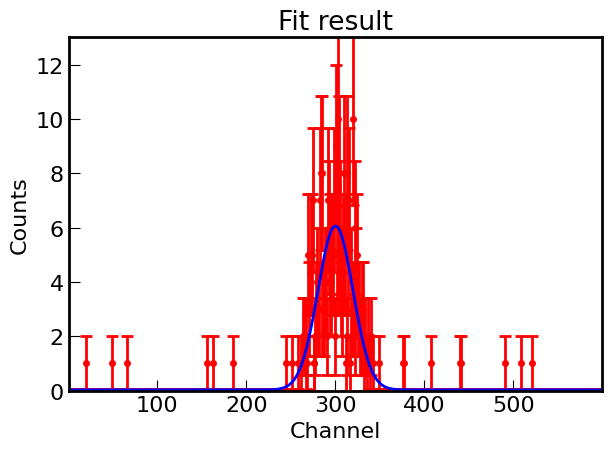

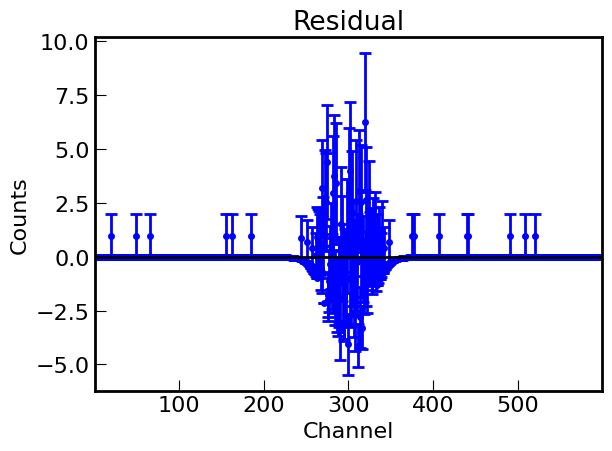

In [7]:
# Plot the data with the best fit (parameters corresponding to the maximum value of the data) and residual
# Other choices are median and mean parameters values selectable with "typeof='mean'" and "typeof='median'"
an.plot(nset=1)

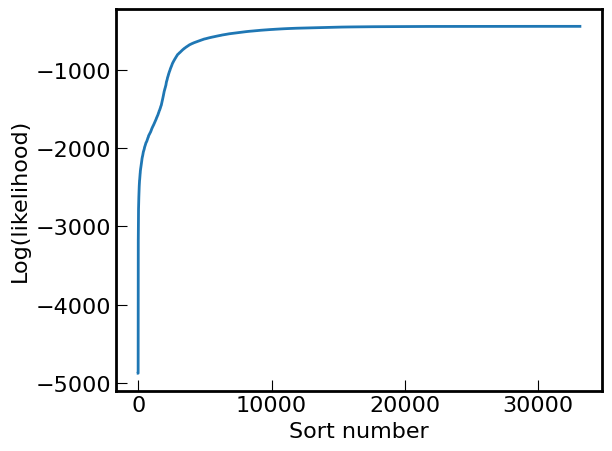

In [8]:
# Plot the likelihood sampling 
an.plot_like()

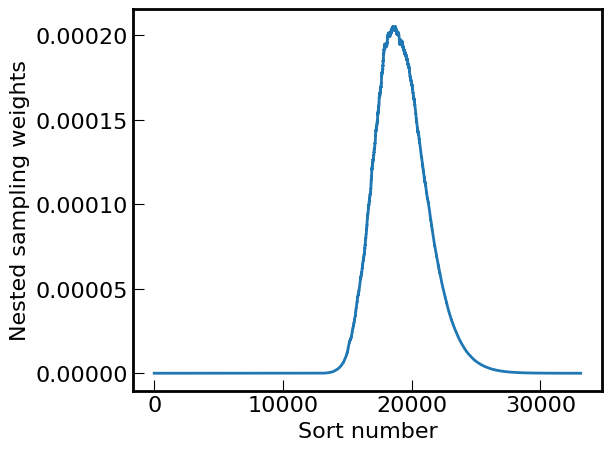

In [9]:
# Plot the weights of nested sampling corresponding to w_n = Delta X_n L_n
an.plot_weights()

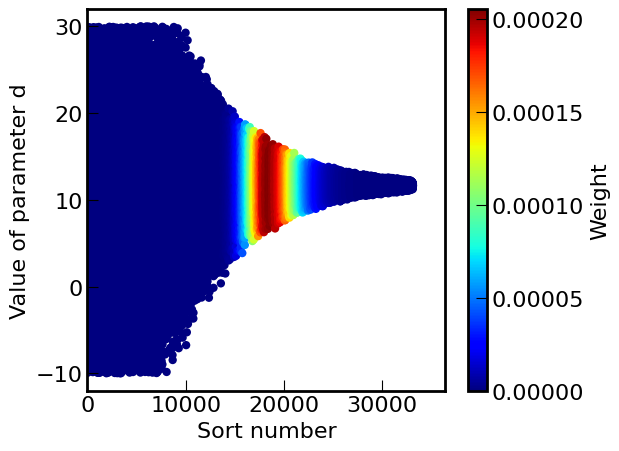

In [10]:
# Plot the parameter convergence
# Colored regions correspond to the high value of the weights
an.plot_par('d')

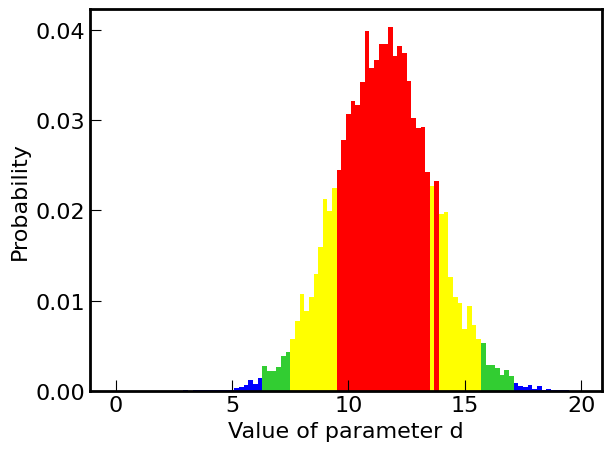

In [11]:
# Plot one parameter histogram
# Red, yellow and green region correspond to 1,2,3 sigmas
an.histo('d',bins=100,xmin=0,xmax=20)

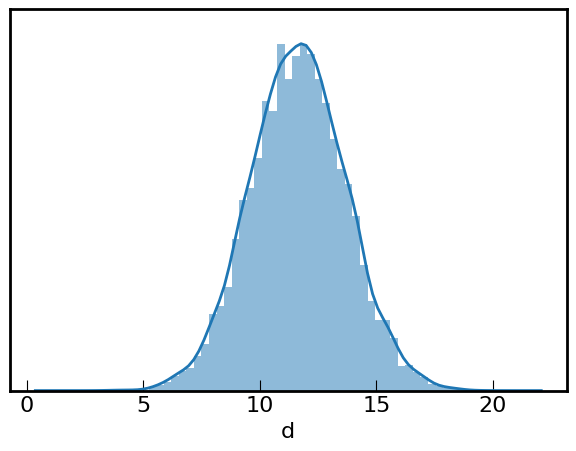

In [12]:
# Plot one parameter interpolated histogram using getdist
# Note: this is a third part function and it requires to specify the path explicitally
an.histo_interp('d')

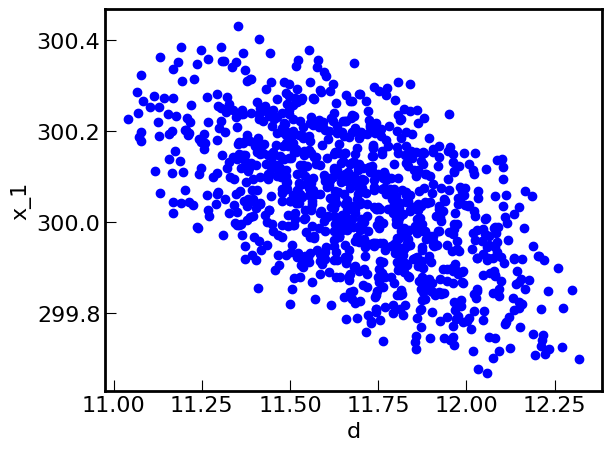

In [13]:
an.plot_live('d','x_1')

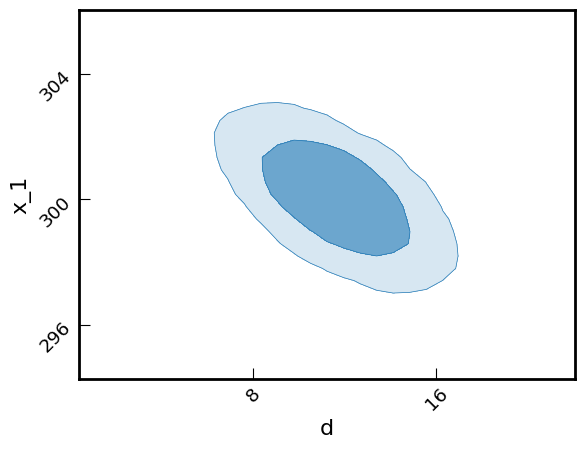

In [14]:
# Same with interpolation from getdist
# Note: this is a third part function and it requires to specify the path explicitally
an.histo2D_interp('d','x_1')


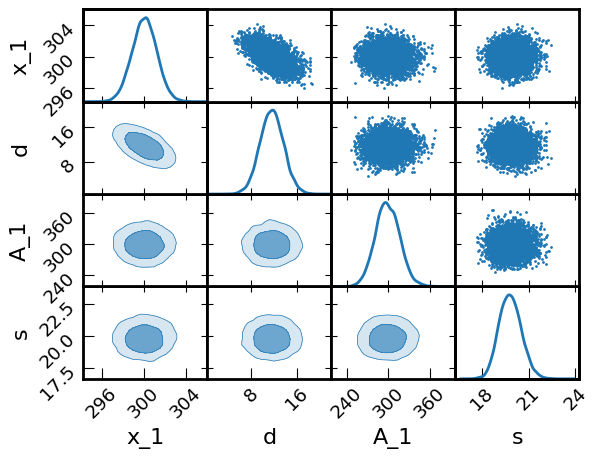

In [15]:
# Triangle plot (from anesthetic) to have a look to all parameters at the same time
an.triangle_plot(['x_1','d','A_1','s'])

# Extract important data and post-processing
The results can be extracted by the output of the python function: `out = conf.sample()`
Alternatively, another function can be used to read the output ASCII files (`output = an.read_output()`) or the `.json` finles

### Using the python function output

In [16]:
# Extract the raw information of evidence
out[ 'evidence']

{'stddev': 0.0,
 'uncertainty': 0.13089643782182184,
 'value': -469.20246483180887}

In [17]:
# Specific information of output parameters
par_name = 'x_1'
print(par_name, ' = ', out['params'][par_name][ 'mean'],' ± ', out['params'][par_name][ 'std'])

x_1  =  300.0675776679612  ±  1.1709708473869813


In [18]:
# Miscelaneous information
out['meta']

{'bayes_complexity': 6.9561358142846075,
 'information': 17.13387743444207,
 'minimal_req_it': 27615214,
 'ncores': 10,
 'timereal': 14.012177999946289,
 'timetotal': 88.940832}

### Using the built in function 'read_output'

In [19]:
# Read the output files in a dictionnary
out = an.read_output()

# Print some results

# The evidence
print('Evidence = ', out['evidence'],'±',out['evidence_err_est'])

# The Bayesian complexity
print('Complexity = ', out['complexity'])

# Some parameter
par_name = 'x_1'
par_index = out['par_name'].index('x_1')
print(par_name, ' = ', out['mean'][par_index],' ± ', out['sd'][par_index])

Evidence =  -469.20246483180887 ± 0.13089643782182184
Complexity =  6.9561358142846075
x_1  =  300.0675776679612  ±  1.1709708473869813


In [20]:
# Statistics (from anesthetic) to have a good estimation of the uncertainties (expecially for the evidence)
an.stats()

logZ 	 = -469.201540 	± 0.141274
D_KL 	 = 17.128018 	± 0.135908
logL_P 	 = -452.073521 	± 0.052783
d_G 	 = 7.196037 	± 0.195419
